## Predicting JABIL's closing stock prices

In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [71]:
np.random.seed(1)
tf.random.set_seed(1)

In [72]:
# Reading Google (Alphabet's) Stock data

df = pd.read_csv('JBL.csv')

In [73]:
# Looking at content using .head() command

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,62.720001,63.279999,61.959999,62.880001,62.744110,918000
1,2022-10-25,62.700001,64.989998,62.630001,64.709999,64.570152,1206500
2,2022-10-26,64.360001,65.150002,64.129997,64.139999,64.001389,1233700
3,2022-10-27,65.129997,65.610001,63.730000,63.980000,63.841732,1021200
4,2022-10-28,64.260002,66.180000,63.880001,65.349998,65.208763,1203300


In [53]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [74]:
# Lets look at some of the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       124 non-null    object 
 1   Open       124 non-null    float64
 2   High       124 non-null    float64
 3   Low        124 non-null    float64
 4   Close      124 non-null    float64
 5   Adj Close  124 non-null    float64
 6   Volume     124 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.9+ KB


In [75]:
# We are going to predict Closing price, we can drop everything else

df = df[['Date', 'Close']]

In [76]:
df.head()

,Date,Close
0,2022-10-24,62.880001
1,2022-10-25,64.709999
2,2022-10-26,64.139999
3,2022-10-27,63.980000
4,2022-10-28,65.349998


In [77]:
df['Close'].isna().sum()

0

No missing values

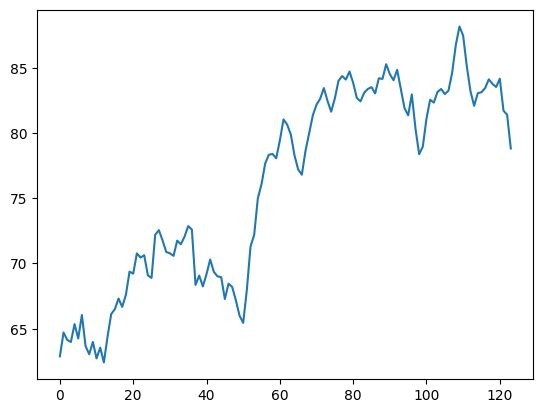

In [78]:
# We do not see any evidence of outliers or missing values, so we are good to go

plt.plot(df['Close'])

## Reshape for standardizing data

In [79]:
# Extract the 'Close' column from the DataFrame
close_prices = np.array(df['Close']).reshape(-1, 1)
close_prices.shape

(124, 1)

## Standardize the values

In [80]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
close_prices_scaled = scaler.fit_transform(close_prices)

## Let's split the data into Test and Train

In [81]:
train, test = train_test_split(close_prices_scaled, test_size=0.3, random_state = 42)

### Since, we need to keep the order, as we are predicting a time series object which needs to be in chronological order

In [82]:
# Splitting based on order

split_point = int(len(close_prices_scaled) * 0.7)
train, test = close_prices_scaled[:split_point], close_prices_scaled[split_point:]


## Let's keep it simple and create X_train, X_test, y_train, y_test using a 9:1 ratio as we are predicting 10th day price based on last 9 days

In [83]:
# 9 days split
num_cols = 9


X_train = []
y_train = []
for i in range(len(train) - num_cols):
    X_train.append(train[i:i+num_cols])
    y_train.append(train[i+num_cols])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(len(test) - num_cols):
    X_test.append(test[i:i+num_cols])
    y_test.append(test[i+num_cols])

X_test, y_test = np.array(X_test), np.array(y_test)


In [84]:
X_train[1]

array([[-1.49759446],
       [-1.57332112],
       [-1.59457759],
       [-1.41256817],
       [-1.55870707],
       [-1.31956985],
       [-1.63576253],
       [-1.71946002],
       [-1.59457759]])

In [85]:
X_test[1]

array([[1.09039774],
       [1.08375465],
       [1.23387917],
       [1.13291095],
       [1.07046954],
       [1.17675191],
       [0.98145777],
       [0.78749137],
       [0.71309245]])

In [86]:
y_train[1]

array([-1.76197323])

In [87]:
y_test[1]

array([0.92565838])

## Simple RNN

In [88]:
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

rnn_model.compile(loss="mse", optimizer='Adam')

In [90]:
# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 4s 27ms/step - loss: 0.4033
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3101
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2379
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1864
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1490
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.1294
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 0.1189
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1120
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1019
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0901
Epoch 11/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0787
Epoch 12/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0680
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 

## Predictions

In [92]:
#Predict:
y_pred = rnn_model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


In [93]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [94]:
comparison

,actual,predicted
0,81.349998,82.050598
1,82.949997,81.625183
2,80.330002,83.211517
3,78.370003,80.885231
4,78.959999,78.803360
5,81.099998,79.441856
6,82.540001,81.548790
7,82.330002,82.699554
8,83.139999,82.351456
9,83.370003,82.916580


In [95]:
rnn_model_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

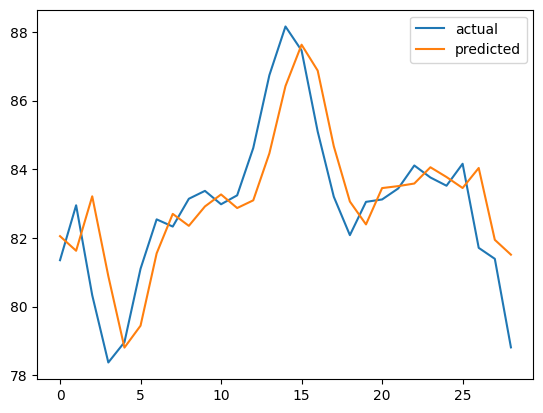

In [96]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with 2 Layers

In [97]:
lstm_model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [98]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_model.compile(loss="mse", optimizer='Adam')

In [99]:
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 6s 24ms/step - loss: 0.8957
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 0.7899
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6915
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6040
Epoch 5/50
2/2 [==============================] - 0s 10ms/step - loss: 0.5204
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4470
Epoch 7/50
2/2 [==============================] - 0s 10ms/step - loss: 0.3823
Epoch 8/50
2/2 [==============================] - 0s 14ms/step - loss: 0.3232
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2814
Epoch 10/50
2/2 [==============================] - 0s 13ms/step - loss: 0.2577
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - loss: 0.2496
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.2505
Epoch 13/50
2/2 [==============================] - 0s 16ms/step 

In [102]:
#Predict:
y_pred = lstm_model.predict(X_test)

1/1 [==============================] - 0s 49ms/step


In [103]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [104]:
comparison

,actual,predicted
0,81.349998,84.544960
1,82.949997,84.456444
2,80.330002,84.282967
3,78.370003,84.023674
4,78.959999,83.561356
5,81.099998,83.063919
6,82.540001,82.633926
7,82.330002,82.274620
8,83.139999,82.131729
9,83.370003,82.205986


In [105]:
lstm_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

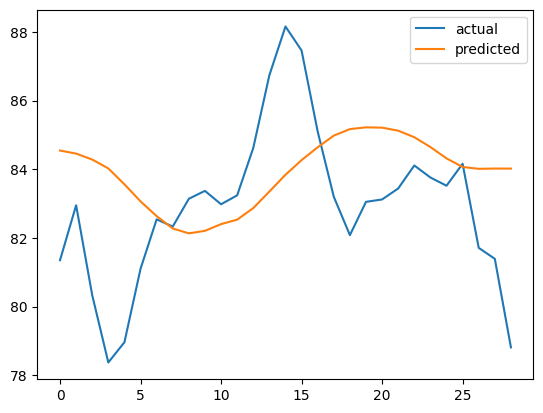

In [106]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU (With more layers)

In [107]:
gru_model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [108]:
np.random.seed(42)
tf.random.set_seed(42)

gru_model.compile(loss="mse", optimizer='Adam')

In [109]:
# Train the model
history = gru_model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 5s 16ms/step - loss: 0.7662
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.7044
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 0.6464
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 0.5926
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.5395
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4909
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 0.4432
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 0.3946
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 0.3511
Epoch 10/50
2/2 [==============================] - 0s 12ms/step - loss: 0.3086
Epoch 11/50
2/2 [==============================] - 0s 13ms/step - loss: 0.2675
Epoch 12/50
2/2 [==============================] - 0s 12ms/step - loss: 0.2300
Epoch 13/50
2/2 [==============================] - 0s 13ms/step

In [111]:
#Predict:
y_pred = gru_model.predict(X_test)

1/1 [==============================] - 0s 437ms/step


In [112]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [113]:
comparison

,actual,predicted
0,81.349998,83.542809
1,82.949997,83.042572
2,80.330002,82.935875
3,78.370003,82.460686
4,78.959999,81.656723
5,81.099998,81.132133
6,82.540001,81.162056
7,82.330002,81.526306
8,83.139999,81.853806
9,83.370003,82.240372


In [114]:
gru_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

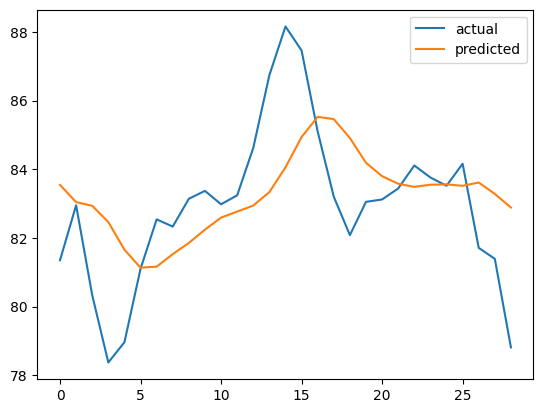

In [115]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Conv1D

In [116]:
conv1d_model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [117]:
np.random.seed(42)
tf.random.set_seed(42)

conv1d_model.compile(loss="mse", optimizer='Adam')

history = conv1d_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 5s 7ms/step - loss: 0.8141
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6786
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5603
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4659
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.3724
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 0.2859
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.2070
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 0.1412
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1040
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1007
Epoch 11/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1106
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1087
Epoch 13/30
3/3 [==============================] - 0s 7ms/step - loss: 

In [118]:
#Predict:
y_pred = conv1d_model.predict(X_test)

1/1 [==============================] - 1s 520ms/step


In [119]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [120]:
comparison

,actual,predicted
0,81.349998,83.697960
1,82.949997,83.294441
2,80.330002,83.017288
3,78.370003,82.545097
4,78.959999,81.918419
5,81.099998,81.341331
6,82.540001,81.064598
7,82.330002,81.130898
8,83.139999,81.374046
9,83.370003,81.754097


In [121]:
conv1d_mse = mean_squared_error(comparison['actual'], comparison['predicted'])

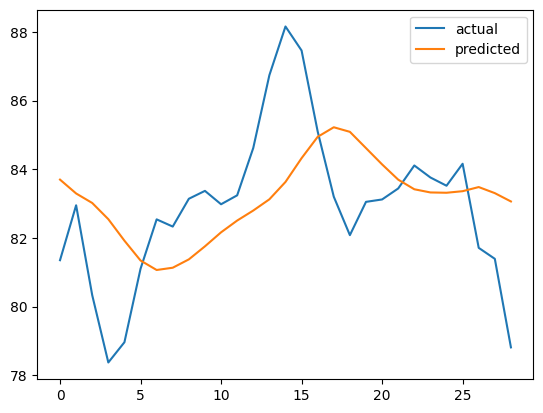

In [122]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [123]:
print('Root Mean Squared Error for SimpleRNN Model is:' + str(rnn_model_mse))
print('Root Mean Squared Error for LSTM Model is:' + str(lstm_mse))
print('Root Mean Squared Error for GRU Model is:' + str(gru_mse))
print('Root Mean Squared Error for Conv1D Model is:' + str(conv1d_mse))

Root Mean Squared Error for SimpleRNN Model is:1.832290688958303
Root Mean Squared Error for LSTM Model is:6.829825372582195
Root Mean Squared Error for GRU Model is:4.096540651357757
Root Mean Squared Error for Conv1D Model is:4.806245536380843


### Summary and Analysis

#### As we can see above the Root Mean Square Error for
#### SimpleRNN Model is 1.832290688958303
#### LSTM Model is 6.829825372582195
#### GRU Model is 4.096540651357757
#### Conv1D Model is 4.806245536380843

#### On the basis of above result, we can that our best model for the JABIL stock price prediction is Simple RNN Model with lowest root mean square value out of all the other models.
#### Since the performace for Simple RNN is the best, we can use Simple RNN for future stock prediction for JABIL.